In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [2]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0504_norm.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.000,0.689,0.496,0.351,0.687,0.599,2.242,0.328,0.817,0.459,0.709,0.535,0.359,1.529,1.394,0.412,0.758,1.007,0.371,0.975,NaN,0.746,NaN,0.494,0.039,0.761,0.597,0.525,0.373,1.165,0.272,0.239,0.371,0.842,0.751,0.859,0.420,0.837,1.171,0.500
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.000,0.691,0.450,0.269,0.633,0.413,2.190,0.306,0.799,0.443,0.686,0.436,0.283,1.288,1.311,0.375,0.817,1.103,0.470,0.834,NaN,0.524,NaN,0.506,0.047,0.795,0.613,0.545,0.396,1.000,0.330,0.229,0.350,0.901,0.804,0.853,0.439,0.610,1.207,0.479
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.039,0.000,0.000,0.225,0.000,0.225,0.000,0.000,0.000,0.000,0.000,0.327,0.119,0.000,0.588,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN,0.000,0.282,0.000,0.000,0.000,0.000,0.000,0.213,0.000,0.506,0.000,0.000,0.000,0.000,0.000,0.134,0.000
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.079,0.000,0.000,0.320,0.000,0.306,0.000,0.000,0.000,0.000,0.000,0.365,0.199,0.000,0.725,0.000,0.000,0.000,0.201,0.000,NaN,0.000,NaN,0.006,0.329,0.000,0.000,0.000,0.000,0.000,0.353,0.000,0.501,0.002,0.000,0.034,0.000,0.111,0.217,0.000
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.000,0.000,0.000,0.640,0.000,0.107,0.427,0.000,0.000,0.000,0.000,0.200,0.000,0.068,0.617,0.000,0.000,0.000,0.106,0.935,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.118,0.000,0.000,0.000,0.000,0.759,0.000,0.030,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.534,2.693,2.368,0.000,1.014,0.000,0.137,1.060,2.428,2.793,2.879,1.311,1.124,0.000,1.076,1.125,3.512,3.827,3.479,0.696,NaN,0.000,NaN,1.951,2.141,3.451,2.872,2.048,2.307,0.000,1.977,0.981,2.247,2.825,3.088,0.292,1.637,0.000,2.149,1.100
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.000,0.039,0.441,0.378,0.431,1.147,0.000,0.000,0.000,0.000,0.000,0.273,0.172,0.688,0.256,0.000,0.000,0.000,0.000,0.000,NaN,0.538,NaN,0.000,0.000,0.000,0.000,0.000,0.000,1.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.993,0.000,0.000
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.337,0.538,0.715,1.212,0.922,1.233,0.955,0.262,0.613,0.913,0.927,0.959,1.600,1.405,0.776,0.508,0.292,0.205,0.000,0.976,NaN,1.132,NaN,0.307,0.348,0.132,0.231,0.695,0.352,1.596,1.154,0.275,0.638,0.544,0.493,0.842,1.018,1.601,0.560,0.372
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.438,0.092,0.372,0.972,0.431,1.819,0.1

-0.004194463711401681 0.9941115961531422
-0.006216949985835304 0.99357993084801
-0.004779132693307259 0.9928814586810073
-0.004707510151997433 0.995474618741903
-0.005309262814770965 0.9945447377750708


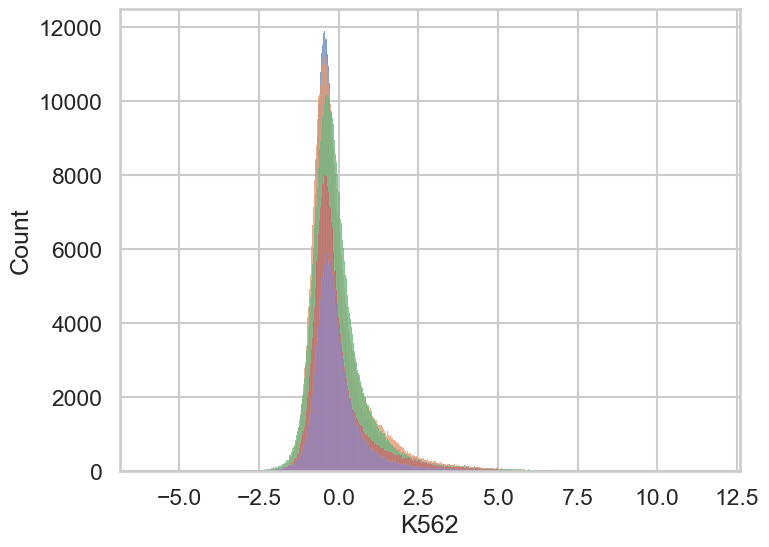

In [3]:
for cell_type in cell_types:
    sns.histplot(MPRA_df[cell_type])
    print(MPRA_df[cell_type].mean(), MPRA_df[cell_type].std())

In [8]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'

data_split_dict['high'] = MPRA_df[cell_types].mean(axis=1) > 1


MPRA_df['std'] = MPRA_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(MPRA_df['std'].dropna(), 95)
data_split_dict['diff'] = (MPRA_df['std'] > threshold)
data_split_dict['const'] = ~data_split_dict['diff']


for cell_type in cell_types:
    data_split_dict[f'{cell_type}_specific'] = (MPRA_df[cell_type] - MPRA_df[cell_types].mean(axis=1)).abs() > 1

for cell_type in cell_types:
    data_split_dict[f'{cell_type}_high'] = (MPRA_df[cell_type]) > 1



# MPRA_df['diff'] = (MPRA_df[cell_types].max(axis=1) - MPRA_df[cell_types].min(axis=1)) > 1
# data_split_dict['const'] = ~MPRA_df['diff']
# data_split_dict['diff']  = MPRA_df['diff']

for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
chrom 760679
designed 0
train 631073
valid 70952
test 58654
ref 389266
alt 371413
high 79000
diff 38034
const 722645
K562_specific 25773
HepG2_specific 14562
SK-N-SH_specific 18305
HCT116_specific 6139
A549_specific 10857
K562_high 87728
HepG2_high 92456
SK-N-SH_high 81561
HCT116_high 52903
A549_high 29155


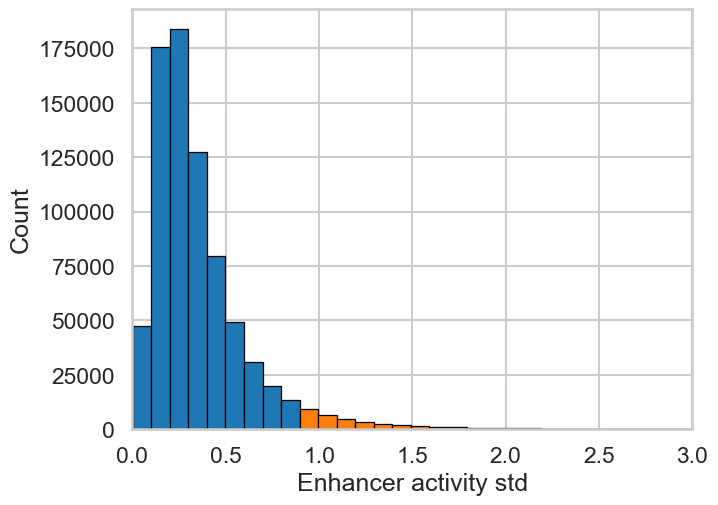

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

ax = sns.histplot(MPRA_df['std'], binwidth=1e-1, edgecolor='black')

for patch in ax.patches:
    center = patch.get_x() + patch.get_width() / 2
    if center < threshold:
        patch.set_facecolor(tab10_colors[0])
    else:
        patch.set_facecolor(tab10_colors[1])

plt.xlim(0, 3)
plt.xlabel(f'Enhancer activity std')
plt.ylabel(f'Count')
plt.savefig(f'figures/hist_enhancer_activity_std.png', dpi=400)
plt.show()

In [5]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']


for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    for data_split in ['total', 'train', 'test', 'const', 'diff', 'specific', 'high']:
        corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
        for cell_type in cell_types:
            for cell_type_2 in cell_types_assay:
                if data_split == 'specific' or data_split == 'high':
                    condition = data_split_dict[f'{cell_type}_{data_split}']
                else:
                    condition = data_split_dict[data_split]
                df = MPRA_df[condition]
                x, y = df[f'{cell_type}'], df[f'{cell_type_2}']
                r, p = pearson(x, y)
                corr_matrix.loc[cell_type, cell_type_2] = r
        print(assay, data_split)
        print(corr_matrix)
        # plt.figure(figsize=(8, 6), dpi=100)
        # plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)
        # sns.heatmap(
        #     corr_matrix, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
        #     annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
        # plt.xticks(
        #     ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
        #     rotation=0, fontsize=14)
        # plt.yticks(
        #     ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
        #     rotation=0, fontsize=14)
        # # plt.title(f'Pearson r between cell types', fontsize=20)
        # # plt.savefig(f'predict_enhancer_activity/figures/heatmap_pearson_r_{data_split}_activity_vs_activity.png', dpi=400)
        # plt.show()

DNase total
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.642        0.529          0.569         0.582       0.556
HepG2         0.575        0.575          0.569         0.555       0.541
SK-N-SH       0.559        0.508          0.566         0.537       0.515
HCT116        0.601        0.568          0.597         0.609       0.574
A549          0.483        0.417          0.444         0.498       0.464
DNase train
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.645        0.533          0.572         0.585       0.559
HepG2         0.578        0.578          0.573         0.559       0.544
SK-N-SH       0.562        0.512          0.570         0.540       0.518
HCT116        0.603        0.570          0.601         0.610       0.576
A549          0.487        0.421          0.447         0.503       0.469
DNase test
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K56

In [18]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    for data_split in ['total', 'train', 'test', 'const', 'diff', 'specific']:
        corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
        for cell_type in cell_types:
            for cell_type_assay in cell_types_assay:
                if data_split == 'specific':
                    condition = data_split_dict[f'{cell_type}_specific']
                else:
                    condition = data_split_dict[data_split]
                df = MPRA_df[condition]
                x = df[f'{cell_type}'] - df[cell_types].mean(axis=1)
                y = df[f'{cell_type_assay}'] - df[cell_types_assay].mean(axis=1)
                r, p = pearson(x, y)
                corr_matrix.loc[cell_type, cell_type_assay] = r

        print(assay, data_split)
        print(corr_matrix)

DNase total
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.274       -0.155         -0.080         0.012      -0.017
HepG2        -0.145        0.267         -0.003        -0.123      -0.041
SK-N-SH      -0.057       -0.036          0.141        -0.061      -0.034
HCT116       -0.176        0.031         -0.028         0.144       0.055
A549         -0.050       -0.113         -0.074         0.184       0.130
DNase train
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.274       -0.155         -0.080         0.013      -0.016
HepG2        -0.145        0.267         -0.002        -0.123      -0.043
SK-N-SH      -0.059       -0.035          0.140        -0.058      -0.035
HCT116       -0.175        0.033         -0.026         0.137       0.055
A549         -0.048       -0.116         -0.077         0.186       0.133
DNase test
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K56

In [13]:
# 各细胞类型的真实活性的相关性

for data_split in ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types, dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x, y = df[f'{cell_type}'], df[f'{cell_type_2}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_2] = r
    print(data_split)
    print(corr_matrix)
    print()
    # plt.figure(figsize=(8, 6), dpi=100)
    # plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)
    # sns.heatmap(
    #     corr_matrix, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
    #     annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    # plt.xticks(
    #     ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
    #     rotation=0, fontsize=14)
    # plt.yticks(
    #     ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
    #     rotation=0, fontsize=14)
    # plt.title(f'Pearson r between cell types', fontsize=20)
    # plt.savefig(f'predict_enhancer_activity/figures/heatmap_pearson_r_{data_split}_activity_vs_activity.png', dpi=400)
    # plt.show()

total
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.801    0.759   0.825 0.724
HepG2   0.801  1.000    0.836   0.879 0.730
SK-N-SH 0.759  0.836    1.000   0.833 0.777
HCT116  0.825  0.879    0.833   1.000 0.825
A549    0.724  0.730    0.777   0.825 1.000

train
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.803    0.761   0.826 0.726
HepG2   0.803  1.000    0.838   0.881 0.733
SK-N-SH 0.761  0.838    1.000   0.835 0.779
HCT116  0.826  0.881    0.835   1.000 0.829
A549    0.726  0.733    0.779   0.829 1.000

valid
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.791    0.755   0.817 0.729
HepG2   0.791  1.000    0.827   0.871 0.717
SK-N-SH 0.755  0.827    1.000   0.821 0.776
HCT116  0.817  0.871    0.821   1.000 0.798
A549    0.729  0.717    0.776   0.798 1.000

test
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.785    0.745   0.817 0.698
HepG2   0.785  1.000    0.819   0.870 0.712
SK-N-SH 0.745  0.819    1.000   0.819 0.757
HCT116

In [10]:
# # seq one model per cell type

# HepG2_pred = np.load(f'saved/0311_SirajMPRA_1_cell_type_HepG2/0311_174938/test_pred.npy')
# K562_pred = np.load(f'saved/0311_SirajMPRA_1_cell_type_K562/0311_180527/test_pred.npy')
# SKNSH_pred = np.load(f'saved/0311_SirajMPRA_1_cell_type_SK-N-SH/0311_201338/test_pred.npy')
# A549_pred = np.load(f'saved/0311_SirajMPRA_1_cell_type_A549/0311_231044/test_pred.npy')
# HCT116_pred = np.load(f'saved/0311_SirajMPRA_1_cell_type_HCT116/0312_010235/test_pred.npy')

# y_pred = np.concatenate([HepG2_pred, K562_pred, SKNSH_pred, A549_pred, HCT116_pred], axis=1)

# cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
# MPRA_df[cell_types_pred] = y_pred

In [11]:
# # 预测值彼此的相关性

# for data_split in ['train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
#     cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
#     corr_matrix = pd.DataFrame(index=cell_types_pred, columns=cell_types_pred)
#     for cell_type in cell_types:
#         for cell_type_2 in cell_types:
#             condition = data_split_dict[data_split]
#             df = MPRA_df[condition]
#             x = df[f'{cell_type}_pred']
#             y = df[f'{cell_type_2}_pred']
#             r, p = pearson(x, y)
#             corr_matrix.loc[f'{cell_type}_pred', f'{cell_type_2}_pred'] = r
#     print(data_split)
#     print(corr_matrix)

In [18]:
MPRA_df['3_cell_types_mean'] = MPRA_df[['K562', 'HepG2', 'SK-N-SH']].mean(axis=1)

In [19]:
# seq feature
# train 3 cell types

y_pred = np.load(f'../saved/0422_Gosai_MPRA_MyResTransformer3/0421_103241/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [20]:
# 预测值和真实值的相关性

for data_split in ['test', 'const', 'diff', 'test_const', 'test_diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.805      0.762        0.754       0.775     0.766
HepG2       0.815      0.839        0.798       0.818     0.824
SK-N-SH     0.797      0.786        0.833       0.803     0.800
HCT116      0.802      0.803        0.789       0.814     0.803
A549        0.697      0.694        0.712       0.720     0.726
const
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.896      0.877        0.862       0.879     0.878
HepG2       0.925      0.936        0.908       0.922     0.924
SK-N-SH     0.905      0.903        0.930       0.907     0.910
HCT116      0.888      0.893        0.880       0.894     0.891
A549        0.793      0.787        0.789       0.801     0.803
diff
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.755      0.575        0.564       0.621     0.582
HepG2       0.738      0.875        0.720       0.784     0.814
SK-N-SH     0.746      0

In [21]:
# 预测值和真实值的相关性

for data_split in ['test', 'const', 'diff', 'test_const', 'test_diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}'] - df['3_cell_types_mean']
            y = df[f'{cell_type_pred}'] - df['3_cell_types_mean']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
            
    print(data_split)
    print(corr_matrix)

test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.062     -0.064       -0.099      -0.031    -0.057
HepG2      -0.047      0.104       -0.073       0.002     0.038
SK-N-SH    -0.024     -0.025        0.173       0.032     0.027
HCT116      0.173      0.211        0.153       0.237     0.204
A549        0.086      0.101        0.140       0.157     0.169
const
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562       -0.017     -0.141       -0.224      -0.107    -0.128
HepG2       0.024      0.164       -0.068       0.055     0.057
SK-N-SH    -0.003      0.006        0.294       0.065     0.085
HCT116      0.131      0.199        0.107       0.204     0.184
A549        0.161      0.163        0.181       0.218     0.225
diff
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.180     -0.366       -0.404      -0.276    -0.351
HepG2      -0.105      0.493       -0.081       0.119     0.269
SK-N-SH    -0.108     -0

0.4366992210565221


<Axes: xlabel='None', ylabel='None'>

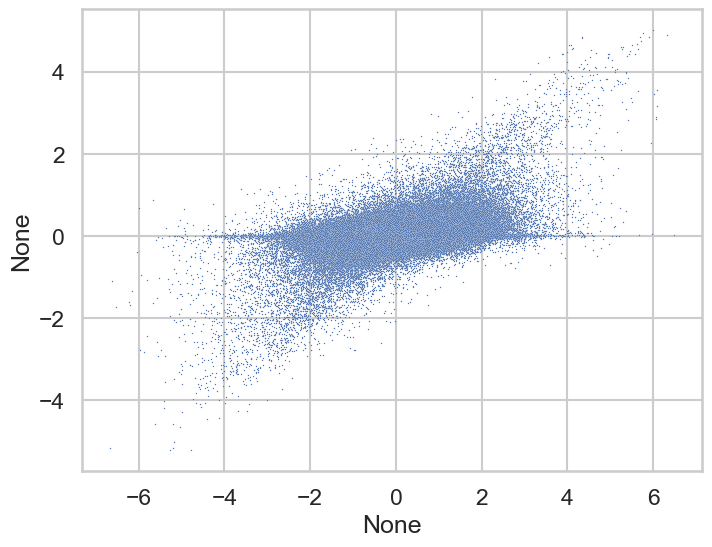

In [22]:
x = MPRA_df[f'K562'] - MPRA_df['HepG2']
y = MPRA_df[f'K562_pred'] - MPRA_df['HepG2_pred']
r, p = pearson(x, y)
print(r)
sns.scatterplot(x=x, y=y, s=1)

In [7]:
# # seq feature
# # train 3 cell types
# # mask 1000

# y_pred = np.load(f'../saved/0422_Gosai_MPRA_MyResTransformer3/0421_103241/test_pred_mask1000.npy')
# cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
# MPRA_df[cell_types_pred] = y_pred

In [8]:
# # 预测值和真实值的相关性

# for data_split in ['test', 'const', 'diff', 'test_const', 'test_diff']:
#     corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
#     for cell_type in cell_types:
#         for cell_type_pred in cell_types_pred:
#             condition = data_split_dict[data_split]
#             df = MPRA_df[condition]
#             x = df[f'{cell_type}']
#             y = df[f'{cell_type_pred}']
#             r, p = pearson(x, y)
#             corr_matrix.loc[cell_type, cell_type_pred] = r
#     print(data_split)
#     print(corr_matrix)

train
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.845      0.834        0.835       0.838     0.835
HepG2       0.895      0.898        0.891       0.897     0.896
SK-N-SH     0.927      0.927        0.929       0.928     0.928
HCT116      0.880      0.880        0.877       0.884     0.881
A549        0.806      0.806        0.804       0.811     0.811
valid
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.761      0.749        0.748       0.755     0.753
HepG2       0.785      0.786        0.780       0.787     0.785
SK-N-SH     0.816      0.814        0.815       0.817     0.816
HCT116      0.784      0.782        0.777       0.791     0.786
A549        0.714      0.711        0.711       0.718     0.717
test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.746      0.736        0.739       0.742     0.740
HepG2       0.782      0.784        0.780       0.785     0.783
SK-N-SH     0.813      

In [27]:
# seq feature
# train 3 cell types

y_pred = np.load(f'../saved/0504_Gosai_MPRA_MyResTransformer3/0504_134132/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [28]:
# 预测值和真实值的相关性

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.908      0.881        0.872       0.892     0.891
HepG2       0.904      0.936        0.909       0.917     0.924
SK-N-SH     0.889      0.900        0.922       0.903     0.906
HCT116      0.884      0.893        0.889       0.899     0.896
A549        0.795      0.813        0.817       0.822     0.824
test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.823      0.797        0.793       0.812     0.809
HepG2       0.810      0.837        0.814       0.823     0.828
SK-N-SH     0.799      0.804        0.826       0.809     0.812
HCT116      0.810      0.817        0.813       0.828     0.824
A549        0.704      0.718        0.724       0.731     0.732
const
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.909      0.898        0.892       0.904     0.904
HepG2       0.917      0.930        0.917       0.920     0.923
SK-N-SH     0.901      

In [31]:
# seq feature
# 3c1a






y_pred = np.load(f'../saved/0504_Gosai_MPRA_MyResTransformer3c1a_DNase/0504_153618/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)
    print()




y_pred = np.load(f'../saved/0504_Gosai_MPRA_MyResTransformer3c1a_H3K4me3/0504_183849/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)
    print()




y_pred = np.load(f'../saved/0504_Gosai_MPRA_MyResTransformer3c1a_H3K27ac/0504_205838/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)
    print()





y_pred = np.load(f'../saved/0504_Gosai_MPRA_MyResTransformer3c1a_CTCF/0504_134841/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)
    print()

train
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.899      0.873        0.882       0.885     0.883
HepG2       0.922      0.942        0.930       0.927     0.932
SK-N-SH     0.879      0.880        0.893       0.884     0.884
HCT116      0.886      0.889        0.893       0.896     0.892
A549        0.789      0.791        0.794       0.804     0.803

test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.821      0.794        0.801       0.809     0.805
HepG2       0.828      0.847        0.833       0.834     0.838
SK-N-SH     0.785      0.783        0.796       0.790     0.789
HCT116      0.811      0.813        0.815       0.825     0.818
A549        0.702      0.704        0.706       0.719     0.717

const
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.902      0.890        0.892       0.897     0.897
HepG2       0.923      0.933        0.927       0.924     0.926
SK-N-SH     0.884    

In [35]:
data = np.array([
    [0.785, 0.844, 0.857, 0.761],
    [0.763, 0.869, 0.792, 0.760],
    [0.687, 0.851, 0.808, 0.756],
    [0.719, 0.816, 0.826, 0.762],
    [0.775, 0.810, 0.791, 0.749],
    [0,0,0,0],
])

data = np.concatenate([data, np.mean(data, axis=1, keepdims=True)], axis=1)


df = pd.DataFrame(
    index=['4 epi features', 'Only DNase', 'Only H3K4me3', 'Only H3K27ac', 'Only CTCF', '8 epi features'],
    columns=['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'average'],
    data=data,
)
df

,K562,HepG2,SK-N-SH,HCT116,average
4 epi features,0.785,0.844,0.857,0.761,0.812
Only DNase,0.763,0.869,0.792,0.760,0.796
Only H3K4me3,0.687,0.851,0.808,0.756,0.776
Only H3K27ac,0.719,0.816,0.826,0.762,0.781
Only CTCF,0.775,0.810,0.791,0.749,0.781
8 epi features,0.000,0.000,0.000,0.000,0.000


In [12]:
# seq
# train 5 cell types

y_pred = np.load(f'saved/0304_SirajMPRA_seq/0304_033552/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [13]:
# 预测值彼此的相关性

for data_split in ['train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
    cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
    corr_matrix = pd.DataFrame(index=cell_types_pred, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}_pred']
            y = df[f'{cell_type_2}_pred']
            r, p = pearson(x, y)
            corr_matrix.loc[f'{cell_type}_pred', f'{cell_type_2}_pred'] = r
    print(data_split)
    print(corr_matrix)

train
             HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2_pred        1.000     0.890        0.930     0.890       0.944
K562_pred         0.890     1.000        0.854     0.884       0.905
SK-N-SH_pred      0.930     0.854        1.000     0.927       0.907
A549_pred         0.890     0.884        0.927     1.000       0.902
HCT116_pred       0.944     0.905        0.907     0.902       1.000
valid
             HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2_pred        1.000     0.880        0.918     0.865       0.934
K562_pred         0.880     1.000        0.836     0.880       0.893
SK-N-SH_pred      0.918     0.836        1.000     0.908       0.885
A549_pred         0.865     0.880        0.908     1.000       0.885
HCT116_pred       0.934     0.893        0.885     0.885       1.000
test
             HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2_pred        1.000     0.877        0.915     0.866       0.932
K562_pred        

In [14]:
# 预测值和真实值的相关性

for data_split in ['train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.927     0.811        0.850     0.809       0.864
K562         0.824     0.932        0.785     0.811       0.835
SK-N-SH      0.852     0.773        0.921     0.841       0.826
A549         0.783     0.757        0.811     0.889       0.785
HCT116       0.877     0.838        0.838     0.833       0.931
valid
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.842     0.730        0.765     0.720       0.777
K562         0.754     0.849        0.714     0.748       0.760
SK-N-SH      0.775     0.695        0.840     0.754       0.739
A549         0.713     0.692        0.733     0.804       0.708
HCT116       0.795     0.758        0.751     0.756       0.850
test
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.839     0.723        0.760     0.717       0.769
K562         0.747     0.844        0.711     0.737       0.752
SK-N-SH      0.760     

In [11]:
# seq + feature
# train 5 cell types

y_pred = np.load(f'saved/0305_SirajMPRA_seq_feature_matrix/0304_033430/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [41]:
# 预测值彼此的相关性

for data_split in ['train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
    cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
    corr_matrix = pd.DataFrame(index=cell_types_pred, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}_pred']
            y = df[f'{cell_type_2}_pred']
            r, p = pearson(x, y)
            corr_matrix.loc[f'{cell_type}_pred', f'{cell_type_2}_pred'] = r
    print(data_split)
    print(corr_matrix)

train
             HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2_pred        1.000     0.978        0.962     0.983       0.978
K562_pred         0.978     1.000        0.965     0.978       0.978
SK-N-SH_pred      0.962     0.965        1.000     0.979       0.975
A549_pred         0.983     0.978        0.979     1.000       0.991
HCT116_pred       0.978     0.978        0.975     0.991       1.000
valid
             HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2_pred        1.000     0.972        0.953     0.979       0.972
K562_pred         0.972     1.000        0.957     0.973       0.973
SK-N-SH_pred      0.953     0.957        1.000     0.973       0.969
A549_pred         0.979     0.973        0.973     1.000       0.989
HCT116_pred       0.972     0.973        0.969     0.989       1.000
test
             HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2_pred        1.000     0.971        0.946     0.977       0.969
K562_pred        

In [12]:
# 预测值和真实值的相关性

for data_split in ['train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.901     0.875        0.864     0.882       0.879
K562         0.838     0.871        0.827     0.843       0.843
SK-N-SH      0.868     0.868        0.889     0.878       0.875
A549         0.835     0.835        0.836     0.864       0.857
HCT116       0.890     0.879        0.874     0.894       0.900
valid
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.824     0.801        0.786     0.807       0.805
K562         0.768     0.808        0.759     0.778       0.780
SK-N-SH      0.787     0.792        0.812     0.801       0.799
A549         0.738     0.745        0.741     0.771       0.767
HCT116       0.808     0.800        0.794     0.818       0.826
test
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.817     0.789        0.776     0.800       0.796
K562         0.759     0.798        0.752     0.769       0.772
SK-N-SH      0.770     

In [15]:
# seq + feature
# train 3 cell types (HepG2, K562, SKNSH), valid 2 cell types (A549 HCT116)

y_pred = np.load(f'saved/0307_SirajMPRA_3_cell_types/0307_065629/test_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [16]:
for data_split in ['train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            x, y = remove_nan(x, y)
            r, p = pearsonr(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.901     0.866        0.861     0.878       0.872
K562         0.842     0.878        0.833     0.845       0.846
SK-N-SH      0.865     0.860        0.893     0.873       0.869
A549         0.789     0.788        0.796     0.821       0.815
HCT116       0.858     0.841        0.842     0.858       0.864
valid
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.820     0.787        0.779     0.797       0.793
K562         0.767     0.810        0.760     0.777       0.778
SK-N-SH      0.784     0.785        0.818     0.798       0.794
A549         0.727     0.733        0.733     0.761       0.758
HCT116       0.784     0.772        0.771     0.793       0.802
test
        HepG2_pred K562_pred SK-N-SH_pred A549_pred HCT116_pred
HepG2        0.818     0.781        0.774     0.797       0.790
K562         0.758     0.802        0.755     0.768       0.772
SK-N-SH      0.768     

In [25]:
# # seq + feature
# # train 4 cell types, valid 1 cell type, leave-one-out

# y_pred = np.zeros((len(MPRA_df), 5))
# y_pred[:, 0] = np.load(f'saved/0306_SirajMPRA_seq_feature_without_HepG2/0306_041237/test_pred.npy')[:, 0]
# y_pred[:, 1] = np.load(f'saved/0306_SirajMPRA_seq_feature_without_K562/0306_050958/test_pred.npy')[:, 1]
# y_pred[:, 2] = np.load(f'saved/0306_SirajMPRA_seq_feature_without_SK-N-SH/0306_061734/test_pred.npy')[:, 2]
# y_pred[:, 3] = np.load(f'saved/0306_SirajMPRA_seq_feature_without_A549/0307_010836/test_pred.npy')[:, 3]
# y_pred[:, 4] = np.load(f'saved/0306_SirajMPRA_seq_feature_without_HCT116/0306_080925/test_pred.npy')[:, 4]

# cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
# MPRA_df[cell_types_pred] = y_pred




y_pred = np.zeros((len(MPRA_df), 5))
y_pred[:, 0] = np.load(f'saved/0317_SirajMPRA_four_cell_type_without_HepG2/0316_141323/test_pred.npy')[:, 0]
y_pred[:, 1] = np.load(f'saved/0317_SirajMPRA_four_cell_type_without_K562/0316_163929/test_pred.npy')[:, 1]
y_pred[:, 2] = np.load(f'saved/0317_SirajMPRA_four_cell_type_without_SK-N-SH/0316_182022/test_pred.npy')[:, 2]
y_pred[:, 3] = np.load(f'saved/0317_SirajMPRA_four_cell_type_without_A549/0316_194504/test_pred.npy')[:, 3]
y_pred[:, 4] = np.load(f'saved/0317_SirajMPRA_four_cell_type_without_HCT116/0316_211026/test_pred.npy')[:, 4]

cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

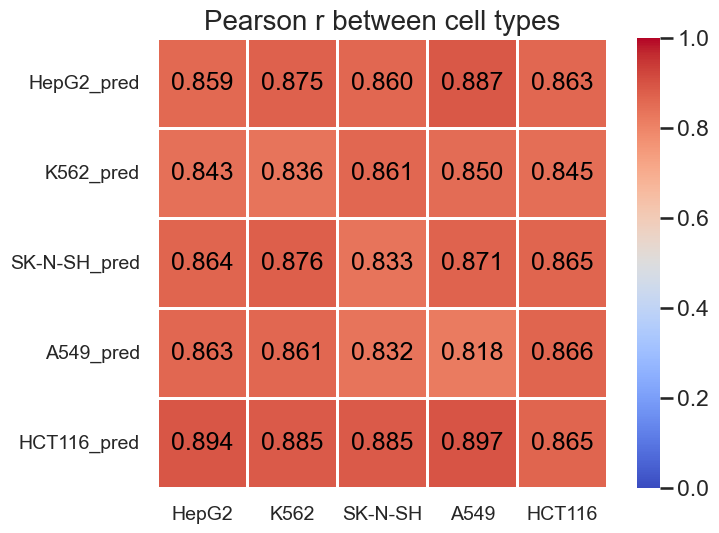

train
         HepG2_pred  K562_pred  SK-N-SH_pred  A549_pred  HCT116_pred
HepG2         0.859      0.875         0.860      0.887        0.863
K562          0.843      0.836         0.861      0.850        0.845
SK-N-SH       0.864      0.876         0.833      0.871        0.865
A549          0.863      0.861         0.832      0.818        0.866
HCT116        0.894      0.885         0.885      0.897        0.865


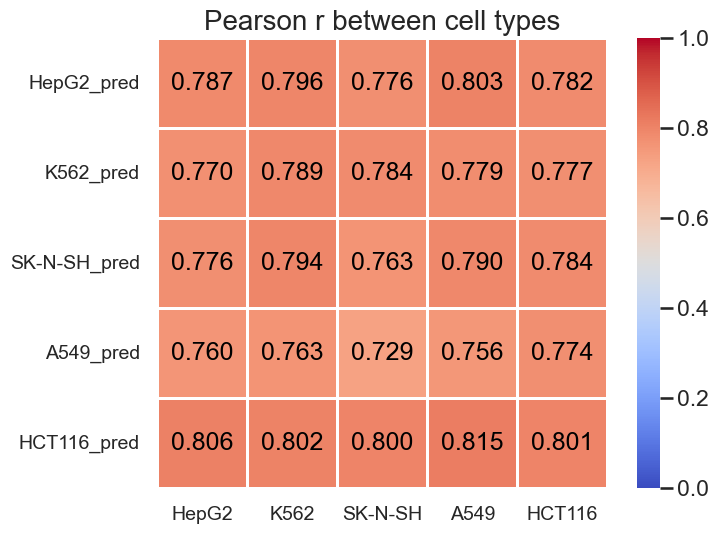

valid
         HepG2_pred  K562_pred  SK-N-SH_pred  A549_pred  HCT116_pred
HepG2         0.787      0.796         0.776      0.803        0.782
K562          0.770      0.789         0.784      0.779        0.777
SK-N-SH       0.776      0.794         0.763      0.790        0.784
A549          0.760      0.763         0.729      0.756        0.774
HCT116        0.806      0.802         0.800      0.815        0.801


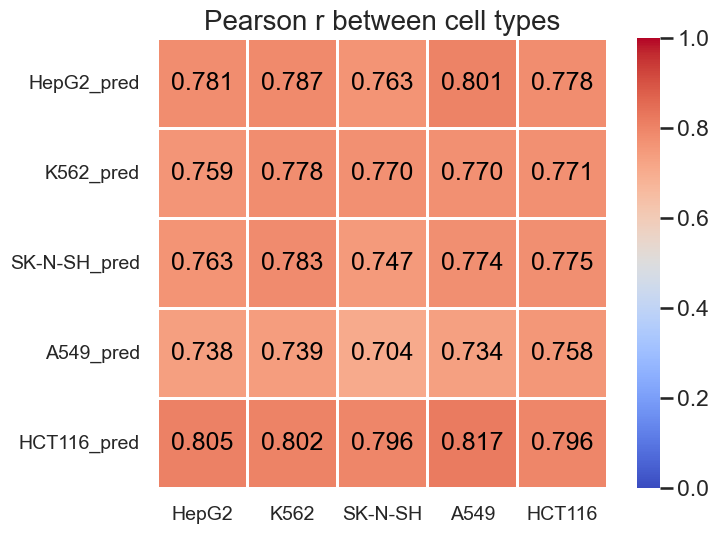

test
         HepG2_pred  K562_pred  SK-N-SH_pred  A549_pred  HCT116_pred
HepG2         0.781      0.787         0.763      0.801        0.778
K562          0.759      0.778         0.770      0.770        0.771
SK-N-SH       0.763      0.783         0.747      0.774        0.775
A549          0.738      0.739         0.704      0.734        0.758
HCT116        0.805      0.802         0.796      0.817        0.796


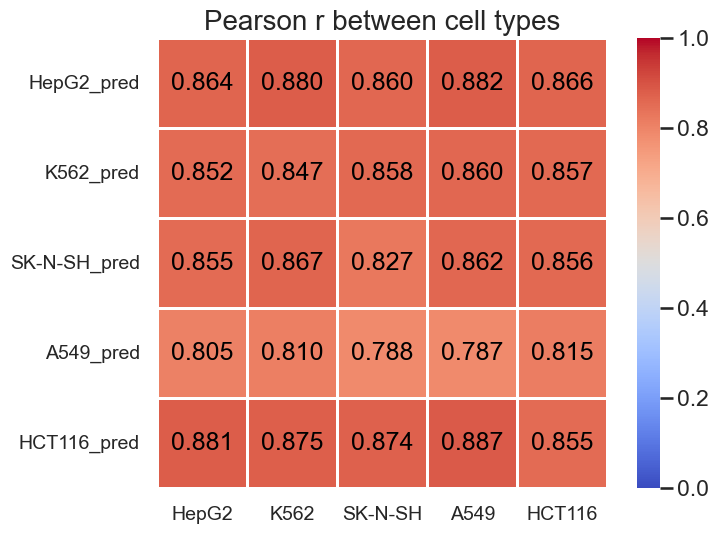

const
         HepG2_pred  K562_pred  SK-N-SH_pred  A549_pred  HCT116_pred
HepG2         0.864      0.880         0.860      0.882        0.866
K562          0.852      0.847         0.858      0.860        0.857
SK-N-SH       0.855      0.867         0.827      0.862        0.856
A549          0.805      0.810         0.788      0.787        0.815
HCT116        0.881      0.875         0.874      0.887        0.855


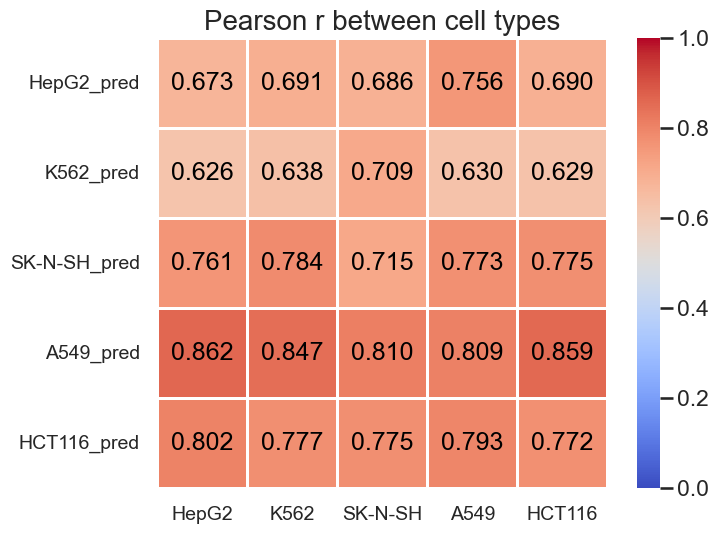

diff
         HepG2_pred  K562_pred  SK-N-SH_pred  A549_pred  HCT116_pred
HepG2         0.673      0.691         0.686      0.756        0.690
K562          0.626      0.638         0.709      0.630        0.629
SK-N-SH       0.761      0.784         0.715      0.773        0.775
A549          0.862      0.847         0.810      0.809        0.859
HCT116        0.802      0.777         0.775      0.793        0.772


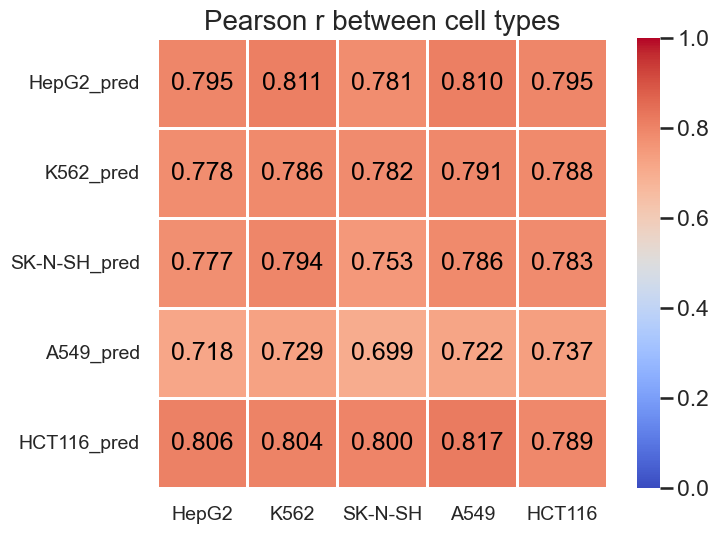

test_const
         HepG2_pred  K562_pred  SK-N-SH_pred  A549_pred  HCT116_pred
HepG2         0.795      0.811         0.781      0.810        0.795
K562          0.778      0.786         0.782      0.791        0.788
SK-N-SH       0.777      0.794         0.753      0.786        0.783
A549          0.718      0.729         0.699      0.722        0.737
HCT116        0.806      0.804         0.800      0.817        0.789


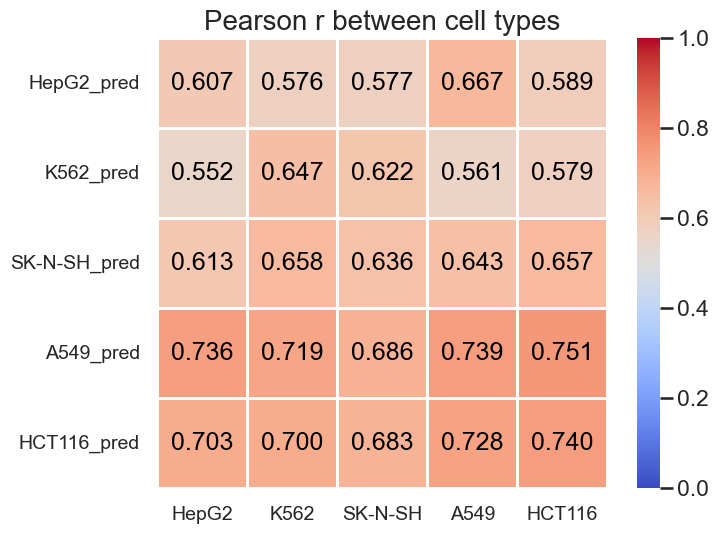

test_diff
         HepG2_pred  K562_pred  SK-N-SH_pred  A549_pred  HCT116_pred
HepG2         0.607      0.576         0.577      0.667        0.589
K562          0.552      0.647         0.622      0.561        0.579
SK-N-SH       0.613      0.658         0.636      0.643        0.657
A549          0.736      0.719         0.686      0.739        0.751
HCT116        0.703      0.700         0.683      0.728        0.740


In [26]:
for data_split in ['train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred, dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = np.array(df[f'{cell_type}'])
            y = np.array(df[f'{cell_type_2}_pred'])
            x, y = remove_nan(x, y)
            r, p = pearsonr(x, y)
            corr_matrix.loc[cell_type, f'{cell_type_2}_pred'] = r

    plt.figure(figsize=(8, 6), dpi=100)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)
    sns.heatmap(
        corr_matrix, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
        annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, labels=cell_types_pred, 
        rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.savefig(f'predict_enhancer_activity/figures/heatmap_pearson_r_{data_split}_seq_feature_pred_vs_activity.png', dpi=400)
    plt.show()
    print(data_split)
    print(corr_matrix)

In [23]:
y_pred_4_0 = np.load(f'saved/0812_SirajMPRA_seq_celltype4/0814_053219/test_pred.npy')
print(y_pred_4_0.shape)

y_pred_4_f = np.load(f'saved/0812_SirajMPRA_seq_feature_celltype4/0815_041254/test_pred.npy')
print(y_pred_4_f.shape)

y_pred_3_H = np.load(f'saved/0815_SirajMPRA_seq_feature_celltype3/0815_041826/test_pred.npy')
print(y_pred_3_H.shape)

y_pred_3_A = np.load(f'saved/0815_SirajMPRA_seq_feature_celltype3/0819_005952/test_pred.npy')
print(y_pred_3_A.shape)

y_pred_3_K = np.load(f'saved/0815_SirajMPRA_seq_feature_celltype3/0815_214824/test_pred.npy')
print(y_pred_3_K.shape)

y_pred_3_H = np.load(f'saved/0815_SirajMPRA_seq_feature_celltype3/0815_214850/test_pred.npy')
print(y_pred_3_H.shape)

(585605, 4)
(1765218,)
(1765218,)
(1765218,)
(1765218,)
(1765218,)


In [25]:
MPRA_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/SirajMPRA/SirajMPRA_total.csv')
# print(MPRA_df.head())

df2 = pd.read_csv('/home/hxcai/cell_type_specific_CRE/MPRA_exp/pretrained_based_models/data/Sei_Siraj_features_concat.csv')
# print(df2.head())


# 下面二选一

for i, cell_type in enumerate(['K562', 'HepG2', 'A549', 'HCT116']):
    MPRA_df[f'{cell_type}_pred'] = y_pred_4_0[:, i]
MPRA_df


# df2['pred'] = y_pred_4_0
# for i, cell_type in enumerate(['K562', 'HepG2', 'A549', 'HCT116']):
#     df = df2[df2['cell_type'] == cell_type][['seq', 'pred']]
#     df.rename(columns={'pred': f'{cell_type}_pred'}, inplace=True)
#     df = df.drop_duplicates(subset=['seq'])
#     MPRA_df = pd.merge(MPRA_df, df, on='seq', how='left')
# MPRA_df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,alt,HepG2_pred,K562_pred,A549_pred,HCT116_pred
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,A,0.860727,0.471197,0.197887,0.369649
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,A,0.745834,0.418501,0.144777,0.290741
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,C,0.044020,-0.045745,-0.043967,-0.115304
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,C,0.009691,-0.069309,-0.071219,-0.152117
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,T,-0.129289,-0.136357,-0.108981,-0.104691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585600,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,C,-0.130473,0.371278,-0.105545,-0.168190
585601,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,G,1.410156,0.740903,0.845696,0.935793
585602,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,G,1.131462,0.488258,0.668862,0.834238
585603,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,C,0.393603,0.419445,0.133474,0.314708


In [26]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in range(1, 23)])
data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in range(3, 23)])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])
data_split_dict['designed'] = MPRA_df['chr'].isin(['chr0'])


cell_types = ['K562', 'HepG2', 'A549', 'HCT116']
MPRA_df['diff'] = (MPRA_df[cell_types].max(axis=1) - MPRA_df[cell_types].min(axis=1)) > 1
data_split_dict['const'] = ~MPRA_df['diff']
data_split_dict['diff']  = MPRA_df['diff']
print(len(MPRA_df), data_split_dict['const'].sum(), data_split_dict['diff'].sum())


# MPRA_df['mean'] = MPRA_df[cell_types].mean(axis=1)
# MPRA_df['std'] = MPRA_df[cell_types].std(axis=1)

# threshold = MPRA_df['std'].quantile(0.2)
# data_split_dict['diff'] = (MPRA_df['std'] >= threshold)
# data_split_dict['const'] = (MPRA_df['std'] < threshold)

# print(data_split_dict['diff'].sum(), data_split_dict['const'].sum())

# # for cell_type in cell_types:
# #     # MPRA_df[f'{cell_type}_zscore'] = (MPRA_df[cell_type] - MPRA_df['mean']) / MPRA_df['std']
# #     # MPRA_df[f'{cell_type}_diff'] = MPRA_df[f'{cell_type}_zscore'].abs() > 1
# #     MPRA_df[f'{cell_type}_diff'] = (MPRA_df[cell_type] - MPRA_df['mean']).abs() > 1
# #     MPRA_df[f'{cell_type}_const'] = ~MPRA_df[f'{cell_type}_diff']
# #     print(f"{cell_type}_diff num = {MPRA_df[f'{cell_type}_diff'].sum()}")

In [28]:
cell_types = ['K562', 'HepG2', 'A549', 'HCT116']

for cell_type in cell_types:
    for cell_type_pred in cell_types:
        for data_split in ['total', 'train', 'valid', 'test', 'const', 'diff']:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            r = pearson(df[f'{cell_type}'], df[f'{cell_type_pred}'])
            print(f'{cell_type:6} true vs {cell_type_pred:6} true, {data_split:5}, pearson r = {r:.3f}')
        print()

HepG2  true vs HepG2  true, total, pearson r = 1.000
HepG2  true vs HepG2  true, train, pearson r = 1.000


HepG2  true vs HepG2  true, valid, pearson r = 1.000
HepG2  true vs HepG2  true, test , pearson r = 1.000
HepG2  true vs HepG2  true, const, pearson r = 1.000
HepG2  true vs HepG2  true, diff , pearson r = 1.000

HepG2  true vs K562   true, total, pearson r = 0.787
HepG2  true vs K562   true, train, pearson r = 0.789
HepG2  true vs K562   true, valid, pearson r = 0.779
HepG2  true vs K562   true, test , pearson r = 0.770
HepG2  true vs K562   true, const, pearson r = 0.833
HepG2  true vs K562   true, diff , pearson r = 0.651

HepG2  true vs A549   true, total, pearson r = 0.738
HepG2  true vs A549   true, train, pearson r = 0.740
HepG2  true vs A549   true, valid, pearson r = 0.737
HepG2  true vs A549   true, test , pearson r = 0.724
HepG2  true vs A549   true, const, pearson r = 0.705
HepG2  true vs A549   true, diff , pearson r = 0.656

HepG2  true vs HCT116 true, total, pearson r = 0.867
HepG2  true vs HCT116 true, train, pearson r = 0.869
HepG2  true vs HCT116 true, valid, pearson 

In [29]:
cell_types = ['K562', 'HepG2', 'A549', 'HCT116']

for cell_type in cell_types:
    for cell_type_pred in [cell_type]:
        for data_split in ['total', 'train', 'valid', 'test', 'const', 'diff']:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            r = pearson(df[f'{cell_type}'], df[f'{cell_type_pred}_pred'])
            print(f'{cell_type} true vs {cell_type_pred} pred, {data_split}, pearson r = {r:.3f}')
        print()

HepG2 true vs HepG2 pred, total, pearson r = 0.895
HepG2 true vs HepG2 pred, train, pearson r = 0.911
HepG2 true vs HepG2 pred, valid, pearson r = 0.813
HepG2 true vs HepG2 pred, test, pearson r = 0.811
HepG2 true vs HepG2 pred, const, pearson r = 0.858
HepG2 true vs HepG2 pred, diff, pearson r = 0.881

K562 true vs K562 pred, total, pearson r = 0.905
K562 true vs K562 pred, train, pearson r = 0.922
K562 true vs K562 pred, valid, pearson r = 0.823
K562 true vs K562 pred, test, pearson r = 0.816
K562 true vs K562 pred, const, pearson r = 0.849
K562 true vs K562 pred, diff, pearson r = 0.898

A549 true vs A549 pred, total, pearson r = 0.847
A549 true vs A549 pred, train, pearson r = 0.864
A549 true vs A549 pred, valid, pearson r = 0.767
A549 true vs A549 pred, test, pearson r = 0.760
A549 true vs A549 pred, const, pearson r = 0.728
A549 true vs A549 pred, diff, pearson r = 0.856

HCT116 true vs HCT116 pred, total, pearson r = 0.901
HCT116 true vs HCT116 pred, train, pearson r = 0.918
HCT

In [30]:
cell_types = ['K562', 'HepG2', 'A549', 'HCT116']

for cell_type in cell_types:
    for cell_type_pred in [cell_type]:
        for data_split in ['test']:
            for data_split_2 in ['total', 'const', 'diff']:
                condition = data_split_dict[data_split] & data_split_dict[data_split_2]
                df = MPRA_df[condition]
                r = pearson(df[f'{cell_type}'], df[f'{cell_type_pred}_pred'])
                print(f'{cell_type:6} true vs {cell_type_pred:6} pred, {data_split:5}, {data_split_2:4}, pearson r = {r:.3f}')
        print()

HepG2  true vs HepG2  pred, test , total, pearson r = 0.811
HepG2  true vs HepG2  pred, test , const, pearson r = 0.768
HepG2  true vs HepG2  pred, test , diff, pearson r = 0.783

K562   true vs K562   pred, test , total, pearson r = 0.816
K562   true vs K562   pred, test , const, pearson r = 0.749
K562   true vs K562   pred, test , diff, pearson r = 0.791

A549   true vs A549   pred, test , total, pearson r = 0.760
A549   true vs A549   pred, test , const, pearson r = 0.612
A549   true vs A549   pred, test , diff, pearson r = 0.762

HCT116 true vs HCT116 pred, test , total, pearson r = 0.822
HCT116 true vs HCT116 pred, test , const, pearson r = 0.804
HCT116 true vs HCT116 pred, test , diff, pearson r = 0.810



In [31]:
cell_types = ['K562', 'HepG2', 'A549', 'HCT116']

for cell_type in cell_types:
    for cell_type_pred in cell_types:
        for data_split in ['total', 'train', 'valid', 'test']:
            for data_split_2 in ['total', 'const', 'diff']:
                condition = data_split_dict[data_split] & data_split_dict[data_split_2]
                df = MPRA_df[condition]
                r = pearson(df[f'{cell_type}'], df[f'{cell_type_pred}_pred'])
                print(f'{cell_type} true vs {cell_type_pred} pred, {data_split}, {data_split_2}, pearson r = {r:.3f}')
            print()

HepG2 true vs HepG2 pred, total, total, pearson r = 0.895
HepG2 true vs HepG2 pred, total, const, pearson r = 0.858
HepG2 true vs HepG2 pred, total, diff, pearson r = 0.881

HepG2 true vs HepG2 pred, train, total, pearson r = 0.911
HepG2 true vs HepG2 pred, train, const, pearson r = 0.876
HepG2 true vs HepG2 pred, train, diff, pearson r = 0.902

HepG2 true vs HepG2 pred, valid, total, pearson r = 0.813
HepG2 true vs HepG2 pred, valid, const, pearson r = 0.770
HepG2 true vs HepG2 pred, valid, diff, pearson r = 0.785

HepG2 true vs HepG2 pred, test, total, pearson r = 0.811
HepG2 true vs HepG2 pred, test, const, pearson r = 0.768
HepG2 true vs HepG2 pred, test, diff, pearson r = 0.783

HepG2 true vs K562 pred, total, total, pearson r = 0.790
HepG2 true vs K562 pred, total, const, pearson r = 0.791
HepG2 true vs K562 pred, total, diff, pearson r = 0.697

HepG2 true vs K562 pred, train, total, pearson r = 0.806
HepG2 true vs K562 pred, train, const, pearson r = 0.810
HepG2 true vs K562 pre

In [18]:
# saved_dir = 'saved/0625_SirajMPRA_A549/0625_025532'

HepG2_pred = np.load(f'saved/0531_Gosai_MPRA_baseline/0613_231345/y_pred_list.npy')
K562_pred = np.load(f'saved/0531_Gosai_MPRA_baseline/0618_001655/y_pred_list.npy')
A549_pred = np.load(f'saved/0625_SirajMPRA_A549/0625_025532/y_pred_list.npy')
HCT116_pred = np.load(f'saved/0625_SirajMPRA_HCT116/0625_025546/y_pred_list.npy')
y_pred_list = np.concatenate([HepG2_pred, K562_pred, A549_pred, HCT116_pred], axis=1)
# print(y_pred_list.shape)

MPRA_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/SirajMPRA/Siraj_Gosai_concat.csv')
for i, cell_type in enumerate(['K562', 'HepG2', 'A549', 'HCT116']):
    MPRA_df[f'{cell_type}_pred'] = y_pred_list[:, i]
MPRA_df

/tmp/ipykernel_694925/4012534825.py:10: DtypeWarning: Columns (6,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/SirajMPRA/Siraj_Gosai_concat.csv')


,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,alt,origin,HepG2_pred,K562_pred,A549_pred,HCT116_pred
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677.0,G,A,NaN,0.603010,0.979300,0.089610,0.228658
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677.0,G,A,NaN,0.523534,0.916531,0.029055,0.214567
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697.0,T,C,NaN,-0.025966,-0.583377,0.334277,-0.240863
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697.0,T,C,NaN,-0.049796,-0.607013,0.293812,-0.277427
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764.0,C,T,NaN,-0.114398,-0.093055,-0.052438,-0.148054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661768,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,NaN,0.591628,-0.315267,0.068697,NaN,NaN,chr0,NaN,NaN,NaN,control,1.488066,-0.080938,0.131021,-0.371440
661769,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,NaN,-0.359782,-0.134821,-0.022281,NaN,NaN,chr0,NaN,NaN,NaN,control,-0.775348,-0.264292,0.012704,-0.667063
661770,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,NaN,0.489900,0.646673,0.462366,NaN,NaN,chr0,NaN,NaN,NaN,control,0.356786,0.398112,0.177435,0.297358
661771,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,NaN,-0.014411,-0.061676,0.239693,NaN,NaN,chr0,NaN,NaN,NaN,control,1.167894,0.079996,0.012424,0.225529


In [21]:
for cell_type in ['K562', 'HepG2', 'A549', 'HCT116']:
    for cell_type_pred in ['K562', 'HepG2', 'A549', 'HCT116']:
        for data_split in ['train', 'valid', 'test', 'designed']:
            condition = data_split_condition_dict[data_split]
            r = pearson(MPRA_df[condition][f'{cell_type}'], MPRA_df[condition][f'{cell_type_pred}_pred'])
            print(f'{cell_type} true vs {cell_type_pred} pred, {data_split} data, pearson r = {r:.3f}')
            print('pearson r', r)
        print()

HepG2 true vs HepG2 pred, train data, pearson r = 0.926
pearson r 0.9259957006812582
HepG2 true vs HepG2 pred, valid data, pearson r = 0.817
pearson r 0.8171515482957136
HepG2 true vs HepG2 pred, test data, pearson r = 0.815
pearson r 0.8148071042476853
HepG2 true vs HepG2 pred, designed data, pearson r = 0.745
pearson r 0.744512519022009

HepG2 true vs K562 pred, train data, pearson r = 0.759
pearson r 0.7587345782678894
HepG2 true vs K562 pred, valid data, pearson r = 0.690
pearson r 0.6903916498834725
HepG2 true vs K562 pred, test data, pearson r = 0.685
pearson r 0.6847371073960745
HepG2 true vs K562 pred, designed data, pearson r = -0.296
pearson r -0.2956059602354766

HepG2 true vs A549 pred, train data, pearson r = 0.632
pearson r 0.6322560229429839
HepG2 true vs A549 pred, valid data, pearson r = 0.583
pearson r 0.582653973730981
HepG2 true vs A549 pred, test data, pearson r = 0.574
pearson r 0.573519726677123
HepG2 true vs A549 pred, designed data, pearson r = 0.033
pearson r 

In [52]:
cell_types = ['K562', 'HepG2', 'A549', 'HCT116']

for cell_type in cell_types:
        for data_split in ['train', 'valid', 'test', 'designed']:
            condition = data_split_condition_dict[data_split]
            x = MPRA_df[condition][f'{cell_type}']

            cell_types_pred = [f'{ct}' for ct in cell_types if ct!= cell_type]
            y = MPRA_df[condition][cell_types_pred].mean(axis=1)
            r = pearson(x, y)
            print(f'{cell_type} true vs {cell_types_pred} pred, {data_split} data, pearson r = {r:.3f}')
        print()

HepG2 true vs ['K562', 'A549', 'HCT116'] pred, train data, pearson r = 0.852
HepG2 true vs ['K562', 'A549', 'HCT116'] pred, valid data, pearson r = 0.843
HepG2 true vs ['K562', 'A549', 'HCT116'] pred, test data, pearson r = 0.836
HepG2 true vs ['K562', 'A549', 'HCT116'] pred, designed data, pearson r = -0.292

K562 true vs ['HepG2', 'A549', 'HCT116'] pred, train data, pearson r = 0.819
K562 true vs ['HepG2', 'A549', 'HCT116'] pred, valid data, pearson r = 0.815
K562 true vs ['HepG2', 'A549', 'HCT116'] pred, test data, pearson r = 0.804
K562 true vs ['HepG2', 'A549', 'HCT116'] pred, designed data, pearson r = -0.292

A549 true vs ['K562', 'HepG2', 'HCT116'] pred, train data, pearson r = 0.779
A549 true vs ['K562', 'HepG2', 'HCT116'] pred, valid data, pearson r = 0.782
A549 true vs ['K562', 'HepG2', 'HCT116'] pred, test data, pearson r = 0.762
0 (less than 10%) values are non-nan.
A549 true vs ['K562', 'HepG2', 'HCT116'] pred, designed data, pearson r = nan

HCT116 true vs ['K562', 'HepG

In [24]:
cell_types = ['K562', 'HepG2', 'A549', 'HCT116']

for cell_type in cell_types:
        for data_split in ['train', 'valid', 'test', 'designed']:
            condition = data_split_condition_dict[data_split]
            x = MPRA_df[condition][f'{cell_type}']

            cell_types_pred = [f'{ct}_pred' for ct in cell_types if ct!= cell_type]
            y = MPRA_df[condition][cell_types_pred].mean(axis=1)
            r = pearson(x, y)
            print(f'{cell_type} true vs {cell_types_pred} pred, {data_split} data, pearson r = {r:.3f}')
        print()

HepG2 true vs ['K562_pred', 'A549_pred', 'HCT116_pred'] pred, train data, pearson r = 0.810
HepG2 true vs ['K562_pred', 'A549_pred', 'HCT116_pred'] pred, valid data, pearson r = 0.727
HepG2 true vs ['K562_pred', 'A549_pred', 'HCT116_pred'] pred, test data, pearson r = 0.723
HepG2 true vs ['K562_pred', 'A549_pred', 'HCT116_pred'] pred, designed data, pearson r = -0.133

K562 true vs ['HepG2_pred', 'A549_pred', 'HCT116_pred'] pred, train data, pearson r = 0.811
K562 true vs ['HepG2_pred', 'A549_pred', 'HCT116_pred'] pred, valid data, pearson r = 0.745
K562 true vs ['HepG2_pred', 'A549_pred', 'HCT116_pred'] pred, test data, pearson r = 0.740
K562 true vs ['HepG2_pred', 'A549_pred', 'HCT116_pred'] pred, designed data, pearson r = -0.147

A549 true vs ['HepG2_pred', 'K562_pred', 'HCT116_pred'] pred, train data, pearson r = 0.762
A549 true vs ['HepG2_pred', 'K562_pred', 'HCT116_pred'] pred, valid data, pearson r = 0.708
A549 true vs ['HepG2_pred', 'K562_pred', 'HCT116_pred'] pred, test data,

In [60]:
for cell_type in ['K562', 'HepG2', 'A549', 'HCT116']:
    for cell_type_pred in ['K562', 'HepG2', 'A549', 'HCT116']:
        for data_split in ['test']:
            condition = data_split_condition_dict[data_split] & ((MPRA_df['HepG2'] - MPRA_df['K562']).abs() > 2)
            x = MPRA_df[condition][f'{cell_type}']
            y = MPRA_df[condition][f'{cell_type_pred}_pred']
            print(len(x))
            r = pearson(x, y)
            print(f'{cell_type} true vs {cell_type_pred} pred, {data_split} data, pearson r = {r:.3f}')
        print()


for cell_type in ['K562', 'HepG2', 'A549', 'HCT116']:
    for cell_type_pred in ['K562', 'HepG2', 'A549', 'HCT116']:
        for data_split in ['test']:
            condition = data_split_condition_dict[data_split] & ((MPRA_df['HepG2'] - MPRA_df['K562']).abs() <= 2)
            x = MPRA_df[condition][f'{cell_type}']
            y = MPRA_df[condition][f'{cell_type_pred}_pred']
            print(len(x))
            r = pearson(x, y)
            print(f'{cell_type} true vs {cell_type_pred} pred, {data_split} data, pearson r = {r:.3f}')
        print()


880
HepG2 true vs HepG2 pred, test data, pearson r = 0.670

880
HepG2 true vs K562 pred, test data, pearson r = 0.044

880
HepG2 true vs A549 pred, test data, pearson r = 0.166

880
HepG2 true vs HCT116 pred, test data, pearson r = 0.258

880
K562 true vs HepG2 pred, test data, pearson r = 0.133

880
K562 true vs K562 pred, test data, pearson r = 0.695

880
K562 true vs A549 pred, test data, pearson r = 0.386

880
K562 true vs HCT116 pred, test data, pearson r = 0.447

880
A549 true vs HepG2 pred, test data, pearson r = 0.484

880
A549 true vs K562 pred, test data, pearson r = 0.390

880
A549 true vs A549 pred, test data, pearson r = 0.585

880
A549 true vs HCT116 pred, test data, pearson r = 0.524

880
HCT116 true vs HepG2 pred, test data, pearson r = 0.549

880
HCT116 true vs K562 pred, test data, pearson r = 0.445

880
HCT116 true vs A549 pred, test data, pearson r = 0.578

880
HCT116 true vs HCT116 pred, test data, pearson r = 0.654

43603
HepG2 true vs HepG2 pred, test data, pears